install libraries







In [ ]:
pip install -r requirements.txt

import libraries

In [11]:
from google.cloud import bigquery
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


create your key_json in GCP and use in this project

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] ="/home/viacheslav/NuxGame/test_task/applied-honor-354909-3a424d1dfcb6.json"

In [3]:
client = bigquery.Client()

In [24]:
events_data = pd.DataFrame()


query = f"""
WITH events_2018 AS (
  SELECT * FROM `firebase-public-project.analytics_153293282.events_2018*`
)
, transformation_events_data AS (
  SELECT DISTINCT
    user_pseudo_id
    , TIMESTAMP_MICROS(event_timestamp) AS event_created_at
    , event_name
    , TIMESTAMP_MICROS(user_first_touch_timestamp) AS first_event_created_at
    , user_ltv.revenue AS revenue
    , user_ltv.currency AS currency
    , param.key AS event_param_key
    , param.value.string_value AS event_param_value
  FROM events_2018,
  UNNEST(event_params) AS param
)
SELECT DISTINCT
  user_pseudo_id
  , DATE(first_event_created_at) AS first_created_at
  , max(event_created_at) AS last_event_created_at
  , min(event_created_at) AS first_event_created_at
  , DATE_DIFF(max(event_created_at), min(event_created_at), DAY) AS event_date_diff
  , COUNT(DISTINCT DATE(event_created_at)) AS eventevent_activity_day
  , revenue
  , currency
  , event_name
  , COUNT(event_created_at) AS event_n
FROM transformation_events_data
GROUP BY 1, 2, 7, 8, 9
"""
query_job = client.query(query)
df = query_job.to_dataframe()
df.to_csv('events_2018.csv', index=False)

In [25]:
df

,user_pseudo_id,first_created_at,last_event_created_at,first_event_created_at,event_date_diff,eventevent_activity_day,revenue,currency,event_name,event_n
0,47216088A078D06F9220263FAF964F10,2016-08-29,2018-10-03 20:22:05.757019+00:00,2018-06-18 15:44:45.682070+00:00,107,52,NaN,None,ad_reward,1064
1,1BDCB994173E8A509680B6351EE6A3AE,2018-09-13,2018-09-13 02:58:18.190040+00:00,2018-09-13 02:58:18.190040+00:00,0,1,NaN,None,ad_reward,7
2,F3C82C9DB04064BA7965BBBD95864189,2018-08-31,2018-08-31 22:47:33.497015+00:00,2018-08-31 15:27:09.725082+00:00,0,1,NaN,None,error,11
3,E5D60C734EF5707FD6AE0E1EF2455641,2018-08-11,2018-09-11 03:46:10.412312+00:00,2018-09-11 01:04:55.408061+00:00,0,1,0.99,USD,ad_reward,84
4,3DEB0C12C49AD19D7ACE68FA59E7ACD6,2017-06-20,2018-10-04 03:21:46.829010+00:00,2018-08-06 03:07:09.158070+00:00,59,42,NaN,None,ad_reward,1288
...,...,...,...,...,...,...,...,...,...,...
144868,7C03C5C81E2B700F2AFD7FA7C5C71983,2016-10-23,2018-07-13 21:04:09.385002+00:00,2018-07-13 21:04:09.385002+00:00,0,1,NaN,None,level_complete_quickplay,5
144869,E3DEEF5987668C1546A012FEDA321ADC,2018-08-19,2018-08-19 17:01:56.898000+00:00,2018-08-19 16:59:43.860000+00:00,0,1,NaN,None,level_complete_quickplay,10
144870,96B108514A10609B9E8F4F78B47B6776,2018-08-15,2018-08-15 20:20:41.798002+00:00,2018-08-15 20:20:41.798002+00:00,0,1,NaN,None,level_complete_quickplay,5
144871,4E6E7CCC91E56E7DAF155D81BEE99073,2017-04-12,2018-09-30 23:14:44.953026+00:00,2018-09-30 23:12:23.289002+00:00,0,1,NaN,None,level_complete_quickplay,6


In [50]:
basic_stats_ad_reward = df[df['event_name'] == "ad_reward"]['event_n'].describe()
basic_stats_ad_level_complete = df[df['event_name'] == "level_complete"]['event_n'].describe()
basic_stats_ad_level_complete_quickplay = df[df['event_name'] == "level_complete_quickplay"]['event_n'].describe()
basic_stats_ad_level_retry = df[df['event_name'] == "level_retry"]['event_n'].describe()
basic_stats_ad_level_retry_quickplay = df[df['event_name'] == "level_retry_quickplay"]['event_n'].describe()
basic_stats_ad_select_content = df[df['event_name'] == "select_content"]['event_n'].describe()
basic_stats_ad_session_start = df[df['event_name'] == "session_start"]['event_n'].describe()
categorical_freq_event_name = df['event_name'].value_counts()

In [51]:
print("Basic Statistics for event ad reward:")
print(basic_stats_ad_reward)
print("Basic Statistics for event level complete:")
print(basic_stats_ad_level_complete)
print("Basic Statistics for event level complete quickplay:")
print(basic_stats_ad_level_complete_quickplay)
print("Basic Statistics for event level retry:")
print(basic_stats_ad_level_retry)
print("Basic Statistics for event level retry quickplay:")
print(basic_stats_ad_level_retry_quickplay)
print("Basic Statistics for event select content:")
print(basic_stats_ad_select_content)
print("Basic Statistics for event session start:")
print(basic_stats_ad_session_start)

Basic Statistics for event ad reward:
count         354.0
mean      37.725989
std      113.882107
min             5.0
25%             7.0
50%            12.5
75%            28.0
max          1288.0
Name: event_n, dtype: Float64
Basic Statistics for event level complete:
count        3669.0
mean      63.500409
std      134.224654
min             1.0
25%            14.0
50%            35.0
75%            63.0
max          4627.0
Name: event_n, dtype: Float64
Basic Statistics for event level complete quickplay:
count        5684.0
mean     166.711471
std      942.945269
min             3.0
25%             5.0
50%            15.0
75%            55.0
max         29950.0
Name: event_n, dtype: Float64
Basic Statistics for event level retry:
count        3537.0
mean        59.9149
std      134.398732
min             2.0
25%            10.0
50%            25.0
75%            60.0
max          4230.0
Name: event_n, dtype: Float64
Basic Statistics for event level retry quickplay:
count        294

In [60]:
df[(df['event_name'] == "session_start") & (df['event_n'] > 500)]

,user_pseudo_id,first_created_at,last_event_created_at,first_event_created_at,event_date_diff,eventevent_activity_day,revenue,currency,event_name,event_n
57856,3B4A6FCA6DCB4C2749409DC4188A306E,2018-05-16,2018-10-04 01:00:40.365000+00:00,2018-06-13 22:15:20.037000+00:00,112,91,NaN,None,session_start,641
57868,10B0D468B5E036E16D13DB53A65F2D49,2017-05-31,2018-10-04 05:16:56.535000+00:00,2018-06-18 15:34:34.634000+00:00,107,100,NaN,None,session_start,1416
57871,DA48D36D07835B1918BDF831AF83B5EF,2016-06-10,2018-10-04 03:51:28.935000+00:00,2018-06-23 11:16:44.089000+00:00,102,101,NaN,None,session_start,1135
57884,372D9BB5088C4E9000C65B06459B403A,2016-09-16,2018-10-03 16:50:18.825000+00:00,2018-06-12 08:22:46.717000+00:00,113,113,NaN,None,session_start,1374
57886,487DE902636DD8A9844A2D61FE7BD568,2018-02-28,2018-10-04 02:28:27.081000+00:00,2018-06-12 23:57:45.148000+00:00,113,76,NaN,None,session_start,776
...,...,...,...,...,...,...,...,...,...,...
59031,42E6A7C3536775E3B8C3DB919AE9A452,2017-09-22,2018-10-02 11:50:01.712000+00:00,2018-06-19 21:17:12.263000+00:00,104,76,NaN,None,session_start,696
59279,3DEB0C12C49AD19D7ACE68FA59E7ACD6,2017-06-20,2018-10-04 02:40:41.618000+00:00,2018-06-24 17:44:01.868001+00:00,101,69,NaN,None,session_start,524
59345,DF0E6C6C5E4F3F34FEC6EE54FD945B05,2017-10-14,2018-10-03 22:27:40.375000+00:00,2018-06-18 17:46:18.634000+00:00,107,81,NaN,None,session_start,780
59799,CFA0F8C5E25A71062E573EF8E6BC9F76,2018-06-03,2018-10-04 02:51:52.087000+00:00,2018-06-19 05:29:41.332000+00:00,106,85,NaN,None,session_start,827


In [63]:
categorical_freq_event_name = df['event_name'].value_counts()
categorical_freq_event_name

event_name
screen_view                 14113
user_engagement             13619
session_start               12281
select_content              11134
level_start_quickplay       10181
post_score                   8598
level_end_quickplay          8177
level_fail_quickplay         6348
level_complete_quickplay     5684
level_start                  4788
level_end                    4391
first_open                   4319
level_up                     3909
level_complete               3669
level_retry                  3537
level_reset_quickplay        3522
os_update                    3004
level_retry_quickplay        2942
firebase_campaign            2735
app_remove                   2635
level_fail                   2382
app_update                   2313
spend_virtual_currency       2047
use_extra_steps              1887
level_reset                  1807
completed_5_levels           1597
no_more_extra_steps          1195
app_exception                 789
error                         596
ad_

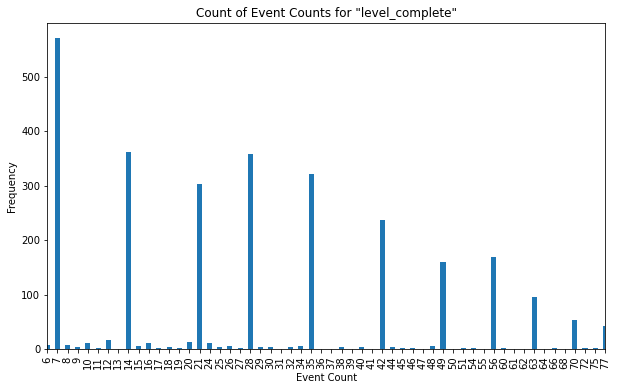

In [57]:
import matplotlib.pyplot as plt

# Фильтрация данных по событию "level_complete"
filtered_data = df[df['event_name'] == 'level_complete']['event_n']

# Подсчет количества встречающихся значений event_n
event_counts = filtered_data.value_counts().sort_index()

# Построение графика
plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar')
plt.title('Count of Event Counts for "level_complete"')
plt.xlabel('Event Count')
plt.ylabel('Frequency')

# Установка пределов оси x
plt.xlim(5, 60)

plt.show()


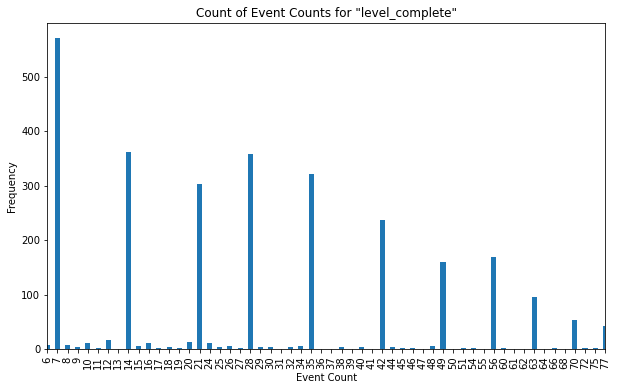

In [61]:
import matplotlib.pyplot as plt

# Фильтрация данных по событию "level_complete"
filtered_data = df[df['event_name'] == 'level_complete']['event_n']

# Подсчет количества встречающихся значений event_n
event_counts = filtered_data.value_counts().sort_index()

# Построение графика
plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar')
plt.title('Count of Event Counts for "level_complete"')
plt.xlabel('Event Count')
plt.ylabel('Frequency')

# Установка пределов оси x
plt.xlim(5, 60)

plt.show()


In [66]:
query_level_data = f"""
WITH events_2018 AS (
  SELECT * FROM `firebase-public-project.analytics_153293282.events_2018*`
)
, transformation_events_data AS (
  SELECT DISTINCT
    user_pseudo_id
    , TIMESTAMP_MICROS(event_timestamp) AS event_created_at
    , event_name
    , param.key AS event_param_key
    , param.value.string_value AS event_param_value
  FROM events_2018,
  UNNEST(event_params) AS param
)
SELECT DISTINCT
  user_pseudo_id
  , event_name
  , event_param_value
  , COUNT(event_created_at) AS level_event_n
FROM transformation_events_data
WHERE event_name LIKE "level_%" AND event_param_key = "level_name" AND event_param_value LIKE "level_%"
GROUP BY 1, 2, 3
"""
query_job_data = client.query(query_level_data)
df_data = query_job_data.to_dataframe()
df_data.to_csv('events_level_2018.csv', index=False)

In [67]:
df_data

,user_pseudo_id,event_name,event_param_value,level_event_n
0,427C31D59AE5368FDB632549C93CF9A1,level_retry,level_31,1
1,9D5106C9C57514E35388CB6CFD237918,level_fail,level_0,1
2,DAA3F353F320A717A0C418A8205292B2,level_fail,level_0,3
3,61F5B317AB1EF10E3C7E68C930A1018C,level_end,level_0,2
4,0AF862AFEB5358EBFDA7AFE3AC908844,level_fail,level_0,3
...,...,...,...,...
141447,5BA2B0B18E94EA7EABE532297E83F0BE,level_end,level_30,1
141448,9603F4B5ABFC1E48B0BF68C83669F845,level_end,level_30,1
141449,377A7FEC96BEA692E4F4AE9B7D64CC4F,level_complete,level_30,1
141450,498C29D342AF10C4A87FD312ACE1433A,level_start,level_30,1


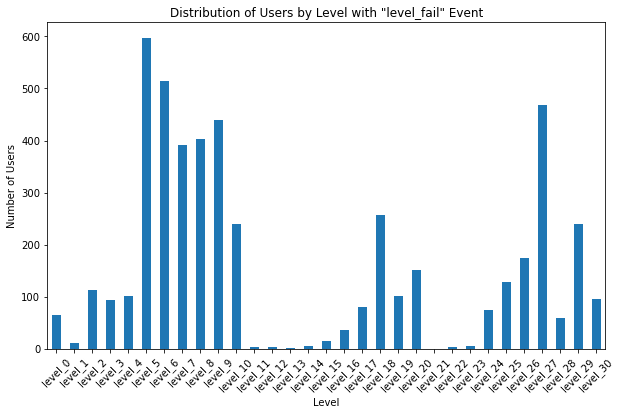

In [71]:
desired_order = ['level_0', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6', 'level_7', 'level_8', 'level_9', 'level_10', 'level_11', 'level_12', 'level_13', 'level_14', 'level_15', 'level_16', 'level_17', 'level_18', 'level_19', 'level_20', 'level_21', 'level_22', 'level_23', 'level_24', 'level_25', 'level_26', 'level_27', 'level_28', 'level_29', 'level_30'
]

fail_data = df_data[df_data['event_name'] == 'level_fail']

fail_counts = fail_data.groupby('event_param_value')['user_pseudo_id'].nunique()

fail_counts_sorted = fail_counts.reindex(desired_order)


plt.figure(figsize=(10, 6))
fail_counts_sorted.plot(kind='bar')
plt.title('Distribution of Users by Level with "level_fail" Event')
plt.xlabel('Level')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


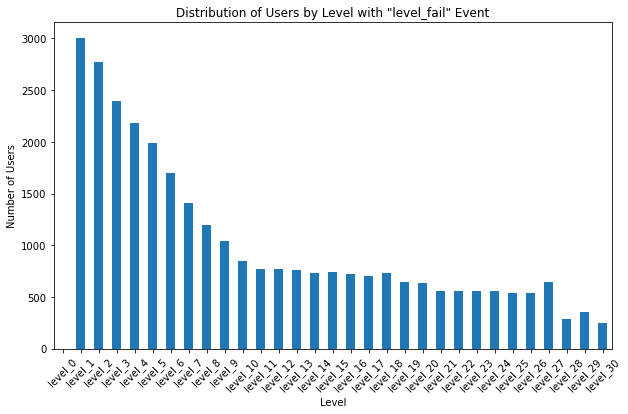

In [75]:
strat_data = df_data[df_data['event_name'] == 'level_start']

strat_counts = strat_data.groupby('event_param_value')['user_pseudo_id'].nunique()

strat_counts_sorted = strat_counts.reindex(desired_order)


plt.figure(figsize=(10, 6))
strat_counts_sorted.plot(kind='bar')
plt.title('Distribution of Users by Level with "level_fail" Event')
plt.xlabel('Level')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

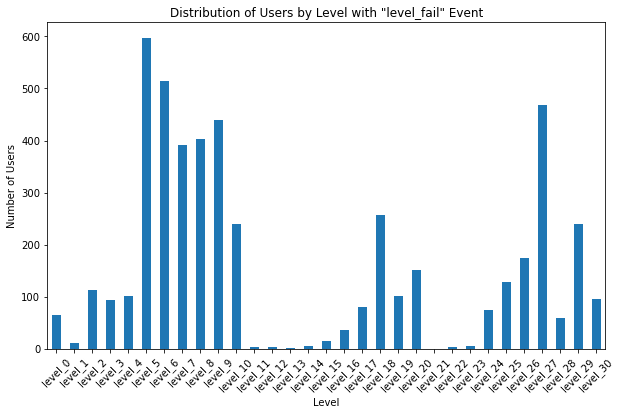

In [76]:
complete_data = df_data[df_data['event_name'] == 'level_complete']

complete_counts = complete_data.groupby('event_param_value')['user_pseudo_id'].nunique()

complete_counts_sorted = complete_counts.reindex(desired_order)


plt.figure(figsize=(10, 6))
complete_counts_sorted.plot(kind='bar')
plt.title('Distribution of Users by Level with "level_fail" Event')
plt.xlabel('Level')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()